In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the merged sales data
df = pd.read_csv("all_sales_with_discounts.csv")

# Display the first few rows
print(df.head())
# Check data types and nulls
print(df.info())


   transaction_id     customer_name     product  quantity      price  \
0               1      Ashley Lewis  Headphones         4  $ 1911.34   
1               2  Christopher Sosa    Keyboard         1   $ 1046.7   
2               3    Jordan Bentley     Monitor         1  $ 1316.64   
3               4   Andrew Caldwell       Phone         4  € 1065.42   
4               5     Jeffrey Mason      Laptop         4   € 245.62   

       total purchase_date currency  price_clean  total_clean  \
0  $ 7645.36    19/02/2024        $      1911.34      7645.36   
1   $ 1046.7    15/02/2024        $      1046.70      1046.70   
2  $ 1316.64    01/02/2024        $      1316.64      1316.64   
3  € 4261.68    02/02/2024        €      1065.42      4261.68   
4   € 982.48    07/02/2024        €       245.62       982.48   

   discounted_price  discounted_total  
0          1720.206          6880.824  
1           942.030           942.030  
2          1184.976          1184.976  
3           958.

In [ ]:
# Basic numerical statistics
print(df.describe())

# Count of all transactions
print("Total Transactions:", len(df))

# currencies
print("Currencies Used:", df['currency'].value_counts())


       transaction_id       quantity    price_clean    total_clean  \
count   225000.000000  225000.000000  225000.000000  225000.000000   
mean     40278.277778       3.002196    1025.031847    3076.070862   
std      25872.190840       1.413621     563.368996    2363.282980   
min          1.000000       1.000000      50.000000      50.040000   
25%      18750.750000       2.000000     536.077500    1176.015000   
50%      37500.500000       3.000000    1025.810000    2431.310000   
75%      59375.250000       4.000000    1511.552500    4551.217500   
max     100000.000000       5.000000    1999.990000    9999.450000   

       discounted_price  discounted_total  
count     225000.000000     225000.000000  
mean         922.528663       2768.463776  
std          507.032097       2126.954682  
min           45.000000         45.036000  
25%          482.469750       1058.413500  
50%          923.229000       2188.179000  
75%         1360.397250       4096.095750  
max         1799.

product
Monitor       99539992.01
Laptop        99478580.37
Phone         99296711.37
Headphones    98873519.78
Tablet        98463078.77
Mouse         98259249.20
Keyboard      98204812.47
Name: total_clean, dtype: float64


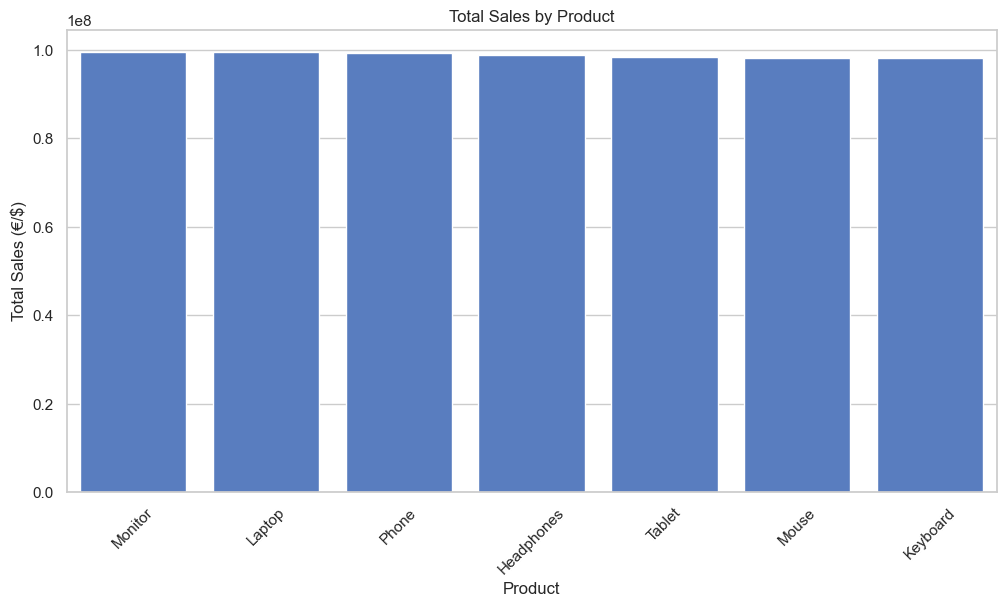

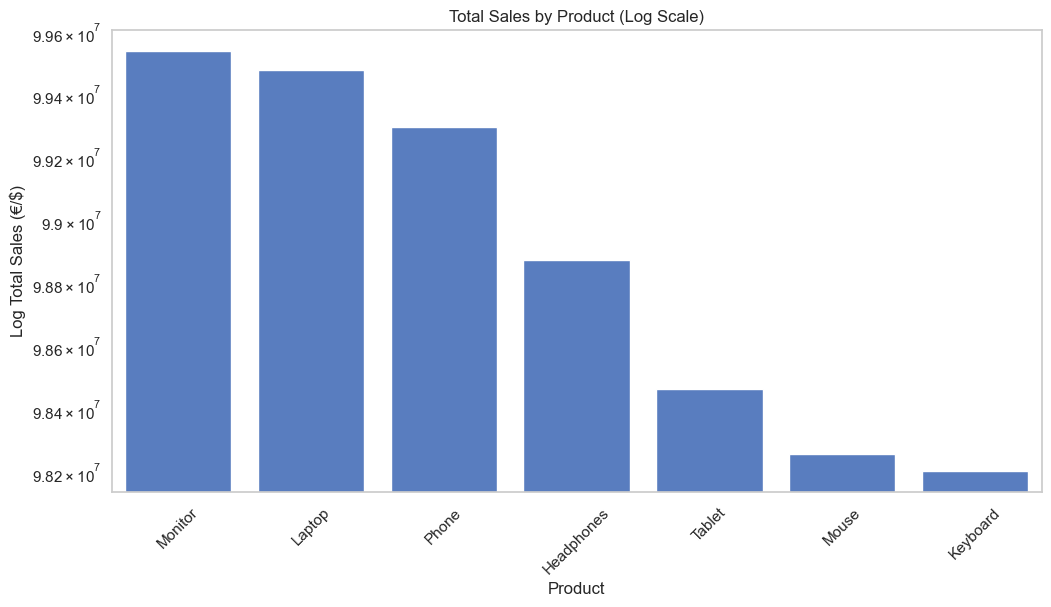

In [ ]:
# Aggregate sales per product
product_sales = df.groupby('product')['total_clean'].sum().sort_values(ascending=False)
print(product_sales)

# Create barplot    
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Total Sales by Product")
plt.ylabel("Total Sales (€/$)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()
#show in log_scale
plt.yscale('log')
plt.title("Total Sales by Product (Log Scale)")
plt.ylabel("Log Total Sales (€/$)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()





customer_name
Michael Williams     285658.90
Michael Johnson      272902.46
Michael Smith        267136.59
David Smith          258681.47
Michael Jones        245898.16
Michael Brown        231173.66
John Smith           222394.40
Christopher Smith    216162.46
James Smith          206120.59
Robert Smith         189001.30
Name: total_clean, dtype: float64


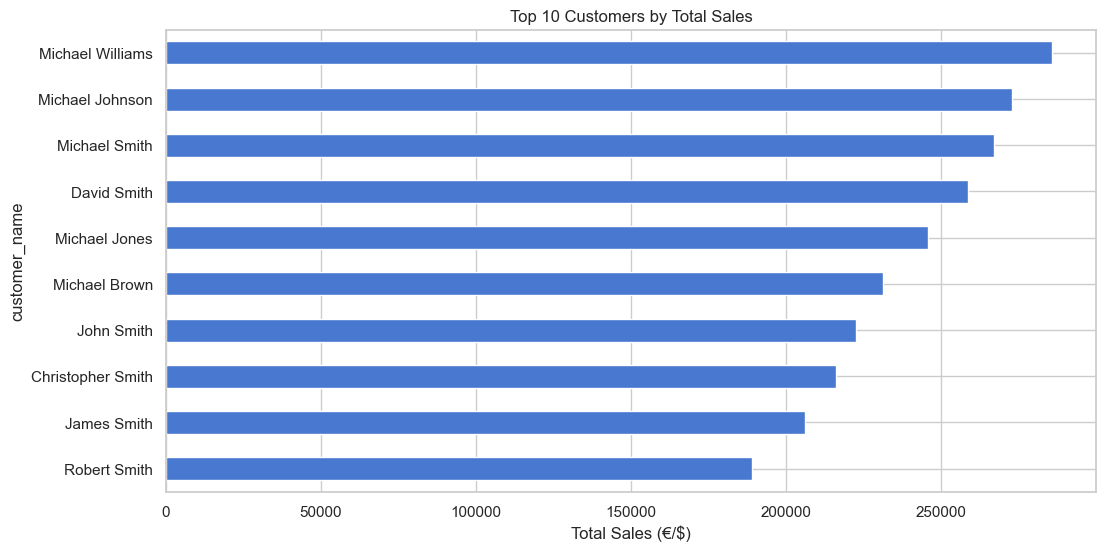

In [ ]:
# Aggregate total sales per customer
top_customers = df.groupby('customer_name')['total_clean'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Horizontal barplot for top customers
top_customers.plot(kind='barh')
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales (€/$)")
plt.gca().invert_yaxis()
plt.show()


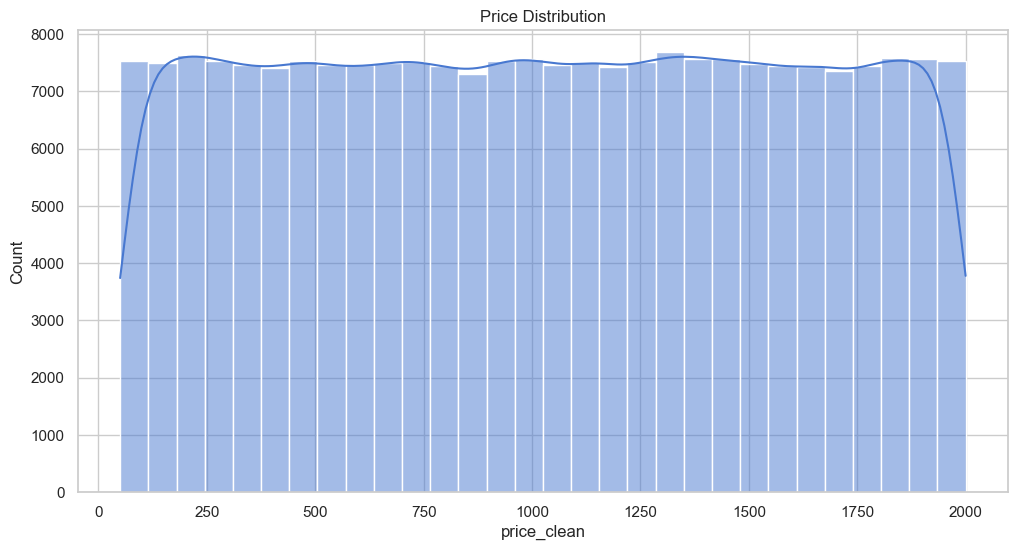

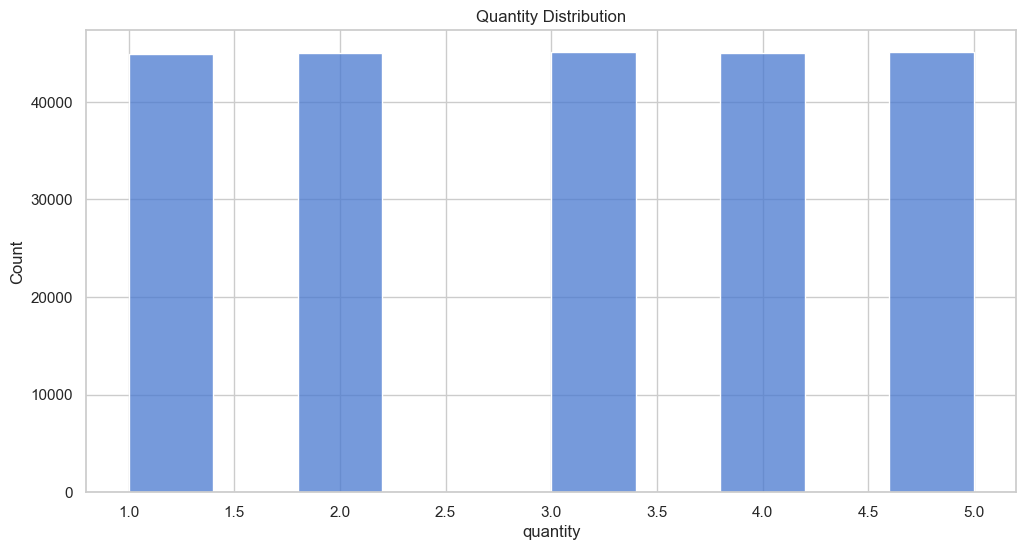

In [25]:
sns.histplot(df['price_clean'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

sns.histplot(df['quantity'], bins=10, kde=False)
plt.title("Quantity Distribution")
plt.show()


c:\Users\medom\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


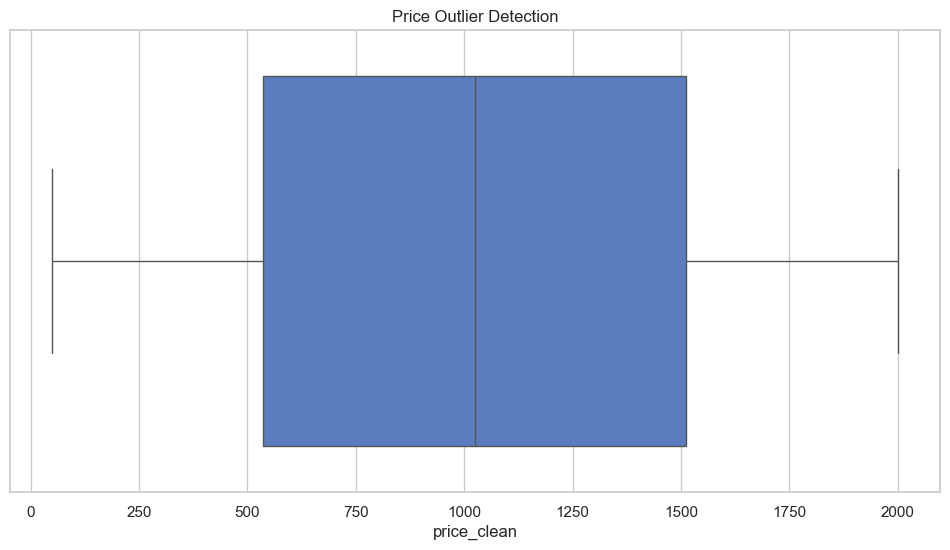

c:\Users\medom\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


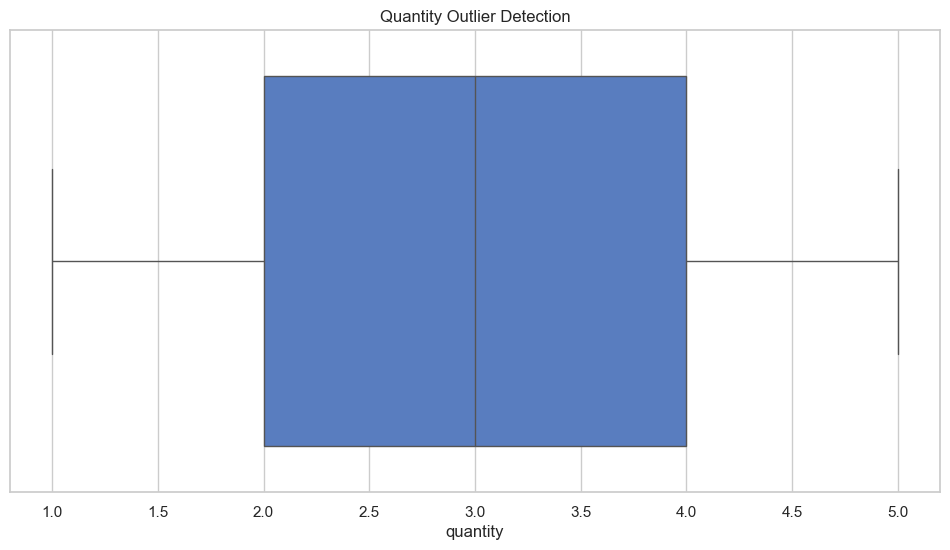

In [26]:
# Boxplot for price
sns.boxplot(x=df['price_clean'])
plt.title("Price Outlier Detection")
plt.show()

# Boxplot for quantity
sns.boxplot(x=df['quantity'])
plt.title("Quantity Outlier Detection")
plt.show()


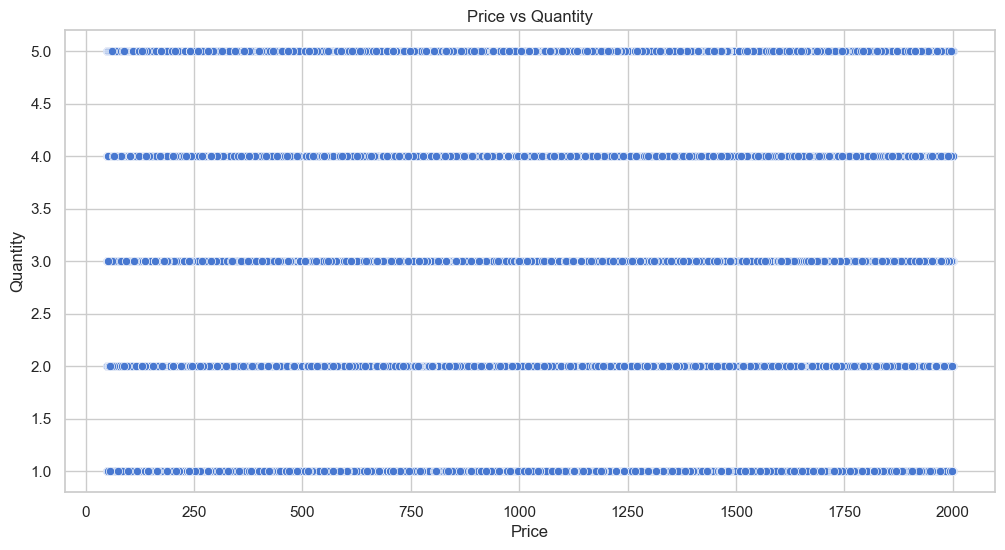

In [28]:
sns.scatterplot(x='price_clean', y='quantity', data=df)
plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()


In [29]:
summary_table = df.groupby('product').agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_clean', 'sum'),
    avg_price=('price_clean', 'mean')
).reset_index()

print(summary_table)


      product  total_quantity  total_sales    avg_price
0  Headphones           96288  98873519.78  1028.085823
1    Keyboard           96408  98204812.47  1020.029155
2      Laptop           96434  99478580.37  1031.727999
3     Monitor           97176  99539992.01  1023.790438
4       Mouse           96103  98259249.20  1022.120171
5       Phone           96858  99296711.37  1027.237159
6      Tablet           96227  98463078.77  1022.205199


In [30]:
summary_table.to_csv("D:/studyAndWork/freelance/Data_transform/product_summary_table.csv", index=False)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

# Make sure output folder exists
output_folder = "analysis_outputs"
os.makedirs(output_folder, exist_ok=True)

pdf_path = os.path.join(output_folder, "EDA_Report.pdf")

# Create the PDF document
with PdfPages(pdf_path) as pdf:

    # 1️⃣ Price Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df['price_clean'], bins=30, kde=True, color='skyblue')
    plt.title("Price Distribution")
    plt.xlabel("Price (€/$)")
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 2️⃣ Quantity Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(df['quantity'], bins=10, kde=False, color='lightgreen')
    plt.title("Quantity Distribution")
    plt.xlabel("Quantity")
    plt.ylabel("Count")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 3️⃣ Price Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df['price_clean'], color='lightblue')
    plt.title("Price Outlier Detection")
    plt.xlabel("Price (€/$)")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 4️⃣ Quantity Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df['quantity'], color='lightgreen')
    plt.title("Quantity Outlier Detection")
    plt.xlabel("Quantity")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 5️⃣ Product Sales Barplot
    product_sales = df.groupby('product')['total_clean'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
    plt.title("Total Sales by Product")
    plt.ylabel("Total Sales (€/$)")
    plt.xlabel("Product")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 5️⃣ Product Sales Barplot in log
    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
    plt.yscale('log')
    plt.title("Total Sales by Product (Log Scale)")
    plt.ylabel("Log Total Sales (€/$)")
    plt.xlabel("Product")
    plt.xticks(rotation=45)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # 6 Quiantity vs price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='price_clean', 
        y='quantity', 
        data=df,
        hue='product',               # Add color by 'product'
        palette='Set2',              # Choose color palette
        s=80,                        # Size of points
        edgecolor='black'            # Optional: black border
    )
    plt.title("Price vs Quantity")
    plt.xlabel("Price (€/$)")
    plt.ylabel("Quantity")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product')
    plt.tight_layout()
    pdf.savefig()
    plt.close()


print(f"✅ All plots saved into single PDF: {pdf_path}")


c:\Users\medom\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\medom\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\medom\AppData\Local\Temp\ipykernel_39648\2892467754.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
c:\Users\medom\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a le

✅ All plots saved into single PDF: analysis_outputs\EDA_Report.pdf
